In [305]:
!pip install tensorflow
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [306]:
import pandas as pd
import numpy as np
import pickle
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt
# from scalecast.Forecaster import Forecaster
import datetime
# univariate lstm example
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dropout
from keras.layers import Dense
from keras.layers import Flatten

In [44]:
df = pd.read_csv("/content/all PRODUCTS inverted.csv")

In [45]:
df.drop(axis = 0, index = [0,1,2,3], inplace = True)


In [46]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df

,Product_id,6224000178857,6772504392625,7622210227829,7622210088512,7622210604347,7622210327833,6223003940027,9555021502701,6223003290023,...,6223007943932,6223003804756,6223003803759,6224000023751,6222003005897,6224010623026,6224010623125,6224010623057,5010357556865,5010357556858
0,31-January-to-14-February,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15-February-to-26-February,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27-February-to-8-Mars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6-April-to-16-April,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17-April-to-25-April,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26-April-to-7-May,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8-May-to-23-May,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,24-May-to-6-June,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7-June-to-21-June,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,22-June-to-6-July,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.iloc[:,1:].astype(int)

,6224000178857,6772504392625,7622210227829,7622210088512,7622210604347,7622210327833,6223003940027,9555021502701,6223003290023,6223006311480,...,6223007943932,6223003804756,6223003803759,6224000023751,6222003005897,6224010623026,6224010623125,6224010623057,5010357556865,5010357556858
0,0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# df.iloc[:0,1:].astype(str)

In [49]:
count=33
z=0
for i in df.iloc[:,1:]:
  num_zeros = (df[i] == "0").sum()
  if num_zeros<count:
    count = num_zeros
    z=i
    print(i)
# print(num_zeros)
print(count)
# print(z)

6772504392625
6040391212396
6223005620224
6223000055991
6223001874980
6223007520706
6223001513919
6224009352432
6224000529024
15


In [189]:

# for i in df.iloc[:,1:]:
#   index=0
#   print(i)
#   while len(df[i])>=18:
#     if df[i][index] == "0":
#       df.drop(index)
#     else:
#       index +=1
products=[]
var=[]
for i in df.iloc[:,1:]:
  products.append(df[i])
  # print(df[i])
products[0]
for x in range(0,len(products)):
  for I in range(0,33):
    var.append(int(products[x][I])) 
print(var)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 

In [25]:
(df["6224000178857"] == "0").sum()

33

In [266]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [267]:
len(var[0:60000])

60000

In [273]:
# define input sequence
timeseries_data = [28,39,26,0,11,11,0,0,0,0,11,0,11,0,0,13,22,0,13,13,0,0,16,21,21,0,0,0,16,16,11,0]
# var[0:60000]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data[0:20], n_steps)

In [274]:
print(X),print(y)

[[28 39 26]
 [39 26  0]
 [26  0 11]
 [ 0 11 11]
 [11 11  0]
 [11  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0 11]
 [ 0 11  0]
 [11  0 11]
 [ 0 11  0]
 [11  0  0]
 [ 0  0 13]
 [ 0 13 22]
 [13 22  0]
 [22  0 13]]
[ 0 11 11  0  0  0  0 11  0 11  0  0 13 22  0 13 13]


(None, None)

In [275]:
X.shape

(17, 3)

In [276]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
# X = X.reshape((X.shape[0],n_features, X.shape[1]))
X = X.reshape((X.shape[0],X.shape[1],n_features))

In [280]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.add(Dense(32))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=1)
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, activation='relu'))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(X, y, epochs=30, batch_size=32)

Epoch 1/500
1/1 [==============================] - 41s 41s/step - loss: 86.7652
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 86.7526
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 86.7400
Epoch 4/500
1/1 [==============================] - 0s 19ms/step - loss: 86.7278
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 86.7154
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 86.7031
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 86.6907
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 86.6783
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 86.6657
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 86.6530
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 86.6397
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 86.6260
Epoch 13/500
1/1 [===================

In [282]:
var[60000:60003]

[0, 0, 0]

In [340]:
# demonstrate prediction for next 10 days
# x_input = [0,13,13]
def predict(a,b,c):
  x_input=[a,b,c]
  temp_input=list(x_input)
  lst_output=[]
  i=0
  while(i<1):
      
      if(len(temp_input)>3):
          x_input=[temp_input[1:]]
          print("{} day input {}".format(i,x_input))
          #print(x_input)
          x_input = np.array(x_input).reshape((1, n_steps, n_features))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.append(yhat[0][0])
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.append(yhat[0][0])
          i=i+1
      else:
          x_input = np.array(x_input).reshape((1, n_steps, n_features))
          yhat = model.predict(x_input, verbose=0)
          # print(yhat[0])
          temp_input.append(yhat[0][0])
          lst_output.append(yhat[0][0])
          i=i+1
  return lst_output 

# print(lst_output)

In [284]:
temp_input[1:]

[21.331926, -9.489173, 33.63949]

In [285]:
timeseries_data

[28,
 39,
 26,
 0,
 11,
 11,
 0,
 0,
 0,
 0,
 11,
 0,
 11,
 0,
 0,
 13,
 22,
 0,
 13,
 13,
 0,
 0,
 16,
 21,
 21,
 0,
 0,
 0,
 16,
 16,
 11,
 0]

In [286]:
len(timeseries_data)

32

In [298]:
lst_output
for i in range(0,len(lst_output)):
  if lst_output[i]<0:
      lst_output[i]=0

In [299]:
lst_output


[0.28087127,
 1.5465007,
 7.8633404,
 0,
 3.3480392,
 0,
 8.296823,
 0,
 10.661938,
 0,
 21.331926,
 0,
 33.63949]

In [300]:
var[60000:]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 21,
 16,
 0,
 17,
 16,
 0,
 0,
 17,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 17,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 16,
 14,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 16,
 16,
 25,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 21,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 23,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 16,
 14,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [301]:
import matplotlib.pyplot as plt

In [308]:
# def predict(int):
#   return"youssef"

In [341]:
demo = gr.Interface(
    fn=predict, 
    inputs=[gr.inputs.Number(label="Number 1"), gr.inputs.Number(label="Number 2"), gr.inputs.Number(label="Number 3")], 
    outputs=gr.outputs.Textbox(label="Predicted Output"),
    title="My Model",
    description="Description of my model"
)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [342]:
demo.launch()   

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

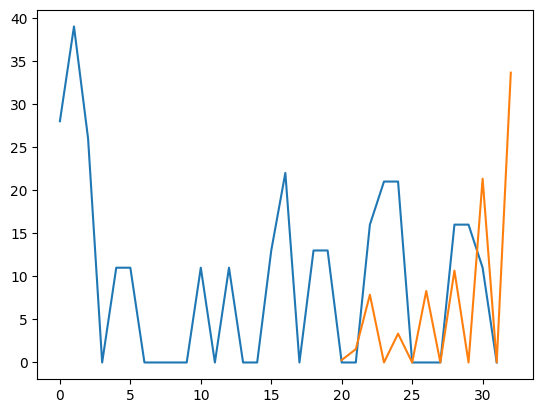

In [302]:
day_new=np.arange(0,32)
day_pred=np.arange(20,33)
# day_ac=np.arange(20,)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
# plt.plot(day_ac,timeseries_data[20:])